In [167]:
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime 
import pandas as pd #판다스 library 불러오기
import numpy as np

In [277]:
df = pd.read_csv("SUBWAY.csv",encoding='utf-8',parse_dates=['STD_DATE']) #공공데이터파일 불러오기

In [294]:
df['Year']=df['STD_DATE'].dt.year #Year에 STD_DATE를 연도별로 분류한 데이터 저장
DATE_YEAR=df.groupby('Year')['ALL_AVG_USER'].aggregate(['max','min','mean']).reset_index() #Year 별로 ALL_AVG_USER에 대한 최대,최소,평균
DATE_YEAR

,Year,max,min,mean
0,2008,112803,407,17347.549984
1,2009,116903,384,17427.873099
2,2010,112964,6,17495.603227
3,2011,114206,312,17820.310464
4,2012,116620,380,17767.231594
5,2013,118533,489,17653.862576
6,2014,118901,0,15314.703809
7,2015,116056,1,15069.056732
8,2016,109950,1,15037.906072
9,2017,112426,1,14126.091527


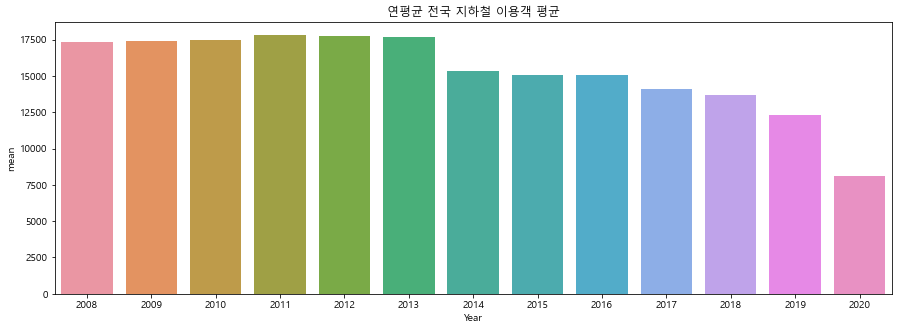

In [279]:
#seaborn을 이용한 막대그래프
plt.rcParams['figure.figsize'] =[15,5]
sns.barplot(
    data =DATE_YEAR,
    x = "Year",
    y = "mean"
)
plt.title("연평균 전국 지하철 이용객 평균")
plt.show()

<AxesSubplot:xlabel='STD_DATE'>

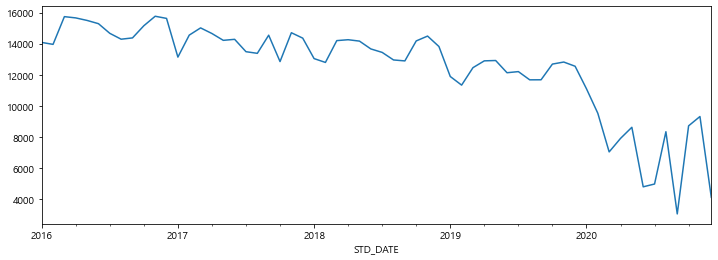

In [292]:
#최근 5년간의 이용객 평균을 곡선그래프로 나타내기
ALL_DATE = df.groupby('STD_DATE').mean().assign(counts=df['STD_DATE'].value_counts()) #날짜별 평균이용객 집계

Recent_DATE=DATE.tail(60)
Recent_DATE['ALL_AVG_USER'].plot(figsize=(12,4)) #ALL_AVG_USER의 데이터를 그래프로 그림

In [360]:
#월별 이용객 최대, 최소, 평균
df['Month']=df['STD_DATE'].dt.month
DATE_Month=df.groupby('Month')['ALL_AVG_USER'].aggregate(['max','min','mean']).reset_index()
DATE_Month

,Month,max,min,mean
0,1,118533,0,14320.798459
1,2,118080,0,14267.298882
2,3,109304,0,15122.144888
3,4,108593,0,15313.547475
4,5,107336,0,15153.891502
5,6,107157,1,14835.028828
6,7,118901,1,14671.336849
7,8,108878,0,13883.034205
8,9,101733,1,14697.145814
9,10,102760,0,14857.844500


In [363]:
#지정한 년도의 데이터만 보여줌
target_year = '2020'
DATE=df.query('STD_DATE.dt.year == @target_year')
DATE.groupby('STD_DATE').mean().assign(counts=df['STD_DATE'].value_counts())

,SUBW_ID,ALL_AVG_USER,TIME_AVG_2406,TIME_AVG_0607,TIME_AVG_0708,TIME_AVG_0809,TIME_AVG_0910,TIME_AVG_1011,TIME_AVG_1112,TIME_AVG_1213,...,TIME_AVG_1718,TIME_AVG_1819,TIME_AVG_1920,TIME_AVG_2021,TIME_AVG_2122,TIME_AVG_2223,TIME_AVG_2324,Year,Month,counts
STD_DATE,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1318.224568,11125.525912,76.468330,224.406910,544.716891,1034.317658,697.786948,509.211132,524.292706,570.428983,...,841.809021,1126.405950,738.908829,502.964491,461.089251,403.514395,227.680422,2020.0,1.0,1042
2020-02-01,1318.224568,9547.037428,65.199616,219.597889,541.944338,1019.283109,640.845489,424.079655,408.191939,440.729367,...,697.554702,1033.709213,666.709213,431.655470,386.479846,333.619962,186.872361,2020.0,2.0,1042
2020-03-01,1318.224568,7056.678503,50.150672,190.560461,456.057582,798.816699,500.857965,301.286948,271.568138,285.245681,...,531.463532,802.227447,514.310940,322.516315,274.254319,225.530710,126.837812,2020.0,3.0,1042
2020-04-01,1318.224568,7925.824376,30.854127,203.170825,484.544146,840.545106,543.879079,351.672745,331.483685,349.334933,...,609.503839,866.820537,559.125720,364.313820,315.680422,267.483685,145.274472,2020.0,4.0,1042
2020-05-01,1318.224568,8643.844530,33.102687,209.378119,495.063340,866.076775,568.794626,398.506718,392.149712,413.809021,...,662.250480,908.419386,581.273512,393.617083,348.755278,298.383877,158.602687,2020.0,5.0,1042
2020-06-01,964.069672,4807.682377,55.706967,109.342213,257.229508,434.741803,283.948770,251.366803,266.584016,277.750000,...,387.577869,473.100410,253.721311,185.606557,154.532787,123.801230,68.143443,2020.0,6.0,488
2020-07-01,1048.558559,4988.770270,55.779279,110.407658,263.031532,444.745495,290.403153,257.709459,277.020270,293.090090,...,404.304054,486.977477,261.540541,190.394144,159.975225,131.256757,73.844595,2020.0,7.0,444
2020-08-01,1371.426854,8357.021042,31.146293,212.606212,508.934870,868.851703,563.215431,385.948898,378.101202,401.098196,...,641.830661,895.692385,563.684369,372.651303,324.850701,273.759519,142.969940,2020.0,8.0,998
2020-09-01,1879.279279,3061.977477,24.815315,70.022523,168.490991,269.720721,179.072072,161.756757,167.932432,177.932432,...,242.144144,288.860360,160.144144,113.765766,97.851351,83.364865,43.211712,2020.0,9.0,222


In [337]:
AREA=df.groupby('SUBW_AREA_NM')['ALL_AVG_USER'].aggregate(['sum','max','min','mean']).reset_index()
AREA_AVG=AREA['mean']
AREA_AVG.index=['광주','대구','대전','부산','수도권']

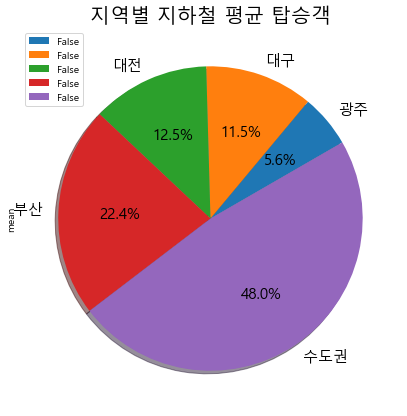

In [362]:
AREA_AVG.plot.pie(figsize=(7,7),autopct='%1.1f%%',startangle=30,shadow=True, textprops={'size':15})
plt.title('지역별 지하철 평균 탑승객',size =20)

plt.legend(AREA_AVG.index=='SUBW_AREA_NM')
plt.show()